In [1]:
import os
from imutils import paths
import random
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

Two feature: image and annotation
Data structure:
{id}.png file in /CelebAMask-HQ folder
{id}_{anno_region}.png file in /CelebAMask-HQ-mask-anno folder

In [2]:
dataset_dir = '/cv_demo_fun_data/CelebAMask-HQ'
images_dir = Path(dataset_dir) / 'CelebA-HQ-img'
annotations_dir = Path(dataset_dir) / 'CelebAMask-HQ-mask-anno'
images_path = [x for x in paths.list_images(images_dir)]
annotations_path = [x for x in paths.list_images(annotations_dir)]

In [10]:
print(len(images_path))

30000


[INFO] Displaying a random image and its annotation...
20700
(1024, 1024)


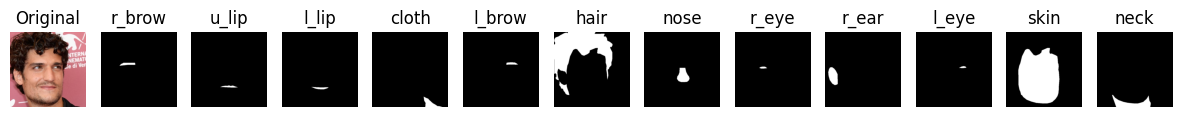

In [15]:
# Grab a random index of the training dataset
print("[INFO] Displaying a random image and its annotation...")
index = random.randint(0, len(images_path))
id = images_path[index].split(os.path.sep)[-1].split('.')[0]

def get_id(image_path):
    id = image_path.split(os.path.sep)[-1].split('.')[0]
    return id

def find_annotation_path(id):
    paths = []
    for path in annotations_path:
        if id in path:
            paths.append(path)
    return paths

def get_anno_attribute(anno_image_path):
    filename = anno_image_path.split(os.path.sep)[-1].split('.')[0]
    return '_'.join(filename.split('_')[1:])
    # return anno_image_path.split(os.path.sep)[-1].split('.')[0].replace(f'{id}_', '')
    
def list_anno_attributes(id):
    paths = find_annotation_path(id)
    return [get_anno_attribute(path) for path in paths]

print(id)
image = Image.open(images_path[index])
print(image.size)
annotation_images_path = find_annotation_path(id)

# Plot the original image and the annotations
plt.figure(figsize=(15, 5))
for plot_index in range(len(annotation_images_path)+1):
    if plot_index == 0:
        # If plot index is 0 display the original image
        plot_image = image
        title = "Original"
    else:
        # Else plot the annotation maps
        # plot_image = annotation[..., plot_index - 1]
        plot_image = Image.open(annotation_images_path[plot_index-1])
        # print(plot_image.size)
        title = get_anno_attribute(annotation_images_path[plot_index-1])
        # title = ["Class Map (R)", "Instance Map (G)"][plot_index - 1]

    # Plot the image
    plt.subplot(1, len(annotation_images_path)+1, plot_index + 1)
    plt.imshow(plot_image)
    plt.title(title)
    plt.axis("off")


In [9]:
labels = np.unique([get_anno_attribute(x) for x in annotations_path])
print(len(labels))
print(labels)

18
['cloth' 'ear_r' 'eye_g' 'hair' 'hat' 'l_brow' 'l_ear' 'l_eye' 'l_lip'
 'mouth' 'neck' 'neck_l' 'nose' 'r_brow' 'r_ear' 'r_eye' 'skin' 'u_lip']
